In [1]:
from src.experiment_based_function import SEEDS
import pandas as pd
%matplotlib inline

In [2]:
import os
import glob


In [3]:
eval_or_grid='eval'

In [4]:
def get_exp8_result(eval_or_grid='eval'):
    res = []    
    for fn in glob.glob('experiment_1001/exp8-spatial-thres-i/*/*/%s_res.csv' % eval_or_grid):
        _, i_thres, seed, _ = fn.split(os.path.sep)
        seed = seed.replace('seed_','')
        df = pd.read_csv(fn, index_col=0)
        df['seed'] = seed
        df['i_thres']=i_thres
        res.append(df)
    return pd.concat(res)

In [5]:
col_mapping = {' ': ' ',
 'RoadNet': 'RoadNet+Spatial',
 'Segment_NO_TOTAL_~2014+Spatial': 'Social type+Spatial', 
 'Segment_TOTAL_~2014+Spatial': 'Social total+Spatial',
 'RoadNet+Segment_NO_TOTAL_~2014+Spatial': 'RoadNet+Social type+Spatial', 
 'RoadNet+Segment_TOTAL_~2014+Spatial': 'RoadNet+Social total+Spatial'}


In [6]:
eval_res = get_exp8_result('eval')

eval_res.ftr_combo_name = eval_res.ftr_combo_name.apply(lambda x: col_mapping[x.split('-')[0]] if x.split('-')[0] in col_mapping else x.split('-')[0])

In [7]:
eval_res.columns, eval_res.shape

(Index(['#ftr_all', '#ftr_keep', '#test_sample', '#train_sample',
        'feature_selection', 'ftr_combo_name', 'i_thres', 'model_name', 'seed',
        'test_acc', 'test_f1_macro', 'test_f1_micro', 'test_f1_weighted',
        'test_mse', 'test_n_classes', 'test_precision_macro',
        'test_precision_micro', 'test_precision_weighted', 'test_recall_macro',
        'test_recall_micro', 'test_recall_weighted', 'train_acc',
        'train_f1_macro', 'train_f1_micro', 'train_f1_weighted', 'train_mse',
        'train_n_classes', 'train_precision_macro', 'train_precision_micro',
        'train_precision_weighted', 'train_recall_macro', 'train_recall_micro',
        'train_recall_weighted', 'y_dist'],
       dtype='object'), (1500, 34))

In [15]:
eval_res.feature_selection.value_counts()

None    800
Name: feature_selection, dtype: int64

In [8]:
print('train', eval_res.train_n_classes.value_counts().to_dict())
print('test', eval_res.test_n_classes.value_counts().to_dict())


print('train', 'test')
print(eval_res.apply(lambda x: (x.train_n_classes, x.test_n_classes), axis=1).value_counts())

train {5: 1500}
test {5: 1200, 4: 300}
train test
(5, 5)    1200
(5, 4)     300
dtype: int64


In [9]:
f1_choices = ['test_f1_weighted', 'test_f1_macro', 'test_f1_micro']

In [10]:
keys = ['model_name', 'i_thres', 'ftr_combo_name']
means = eval_res.groupby(keys).mean()[f1_choices]
stds = eval_res.groupby(keys).std()[f1_choices]


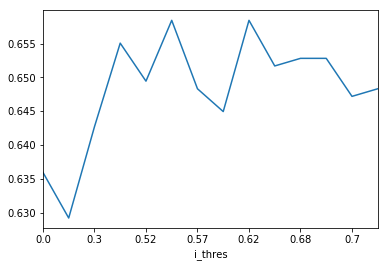

In [11]:
means[means.index.get_level_values(1)!='Only'].groupby('i_thres').apply(lambda x: x.test_f1_micro.max()).plot()

In [12]:
means[means.index.get_level_values(1).isin(['0.54', '0.62'])]

test_f1_weighted  \
model_name i_thres ftr_combo_name                                   
BAGcls     0.54    RoadNet+Social total+Spatial          0.597857   
                   RoadNet+Social type+Spatial           0.613584   
                   RoadNet+Spatial                       0.591176   
                   Social total+Spatial                  0.542717   
                   Social type+Spatial                   0.599082   
           0.62    RoadNet+Social total+Spatial          0.596059   
                   RoadNet+Social type+Spatial           0.614964   
                   RoadNet+Spatial                       0.573978   
                   Social total+Spatial                  0.542717   
                   Social type+Spatial                   0.599444   
XGBcls     0.54    RoadNet+Social total+Spatial          0.588775   
                   RoadNet+Social type+Spatial           0.638617   
                   RoadNet+Spatial                       0.583298   
                   Social total+Spatial                  0.539795   
                   Social type+Spatial                   0.594321   
           0.62    RoadNet+Social total+Spatial          0.597419   
                   RoadNet+Social type+Spatial           0.637058   
                   RoadNet+Spatial                       0.565697   
                   Social total+Spatial                  0.539795   
                   Social type+Spatial                   0.589724   

                                                 test_f1_macro  test_f1_micro  
model_name i_thres ftr_combo_name                                              
BAGcls     0.54    RoadNet+Social total+Spatial       0.388580       0.620225  
                   RoadNet+Social type+Spatial        0.404049       0.635955  
                   RoadNet+Spatial                    0.439314       0.610112  
                   Social total+Spatial               0.328923       0.564045  
                   Social type+Spatial                0.420415       0.620225  
           0.62    RoadNet+Social total+Spatial       0.386773       0.616854  
                   RoadNet+Social type+Spatial        0.430850       0.637079  
                   RoadNet+Spatial                    0.402514       0.593258  
                   Social total+Spatial               0.328923       0.564045  
                   Social type+Spatial                0.434244       0.620225  
XGBcls     0.54    RoadNet+Social total+Spatial       0.380779       0.612360  
                   RoadNet+Social type+Spatial        0.439816       0.658427  
                   RoadNet+Spatial                    0.400594       0.603371  
                   Social total+Spatial               0.338856       0.559551  
                   Social type+Spatial                0.437413       0.610112  
           0.62    RoadNet+Social total+Spatial       0.381594       0.620225  
                   RoadNet+Social type+Spatial        0.442221       0.658427  
                   RoadNet+Spatial                    0.395345       0.583146  
                   Social total+Spatial               0.338856       0.559551  
                   Social type+Spatial                0.454997       0.610112

In [13]:
means[means.index.get_level_values(1)!='Only'].groupby('i_thres').apply(lambda x: x.test_f1_micro.max())

i_thres
0.0     0.635955
0.1     0.629213
0.3     0.642697
0.5     0.655056
0.52    0.649438
0.54    0.658427
0.57    0.648315
0.60    0.644944
0.62    0.658427
0.64    0.651685
0.68    0.652809
0.69    0.652809
0.7     0.647191
0.8     0.648315
dtype: float64

In [14]:
means[means.index.get_level_values(1)!='Only'].groupby('i_thres').apply(lambda x: x.test_f1_macro.max())

i_thres
0.0     0.421244
0.1     0.414080
0.3     0.433601
0.5     0.436164
0.52    0.436164
0.54    0.439816
0.57    0.445774
0.60    0.454997
0.62    0.454997
0.64    0.457463
0.68    0.486380
0.69    0.457463
0.7     0.443329
0.8     0.452443
dtype: float64

In [15]:
def deliverable_table(table):
    table = table[['RoadNet+Spatial', 
                   'Social total+Spatial',
                   'Social type+Spatial',
                   'RoadNet+Social total+Spatial',
                   'RoadNet+Social type+Spatial']]

    table.index.name=None
    return table

In [16]:
from IPython.display import display

In [17]:
[float(j) for j in means.reset_index().i_thres.unique()[:-1]]

[0.0, 0.1, 0.3, 0.5, 0.52, 0.54, 0.57, 0.6, 0.62, 0.64, 0.68, 0.69, 0.7, 0.8]

In [18]:
f1_type = f1_choices[2]
for i_thres in [0.0, 0.1, 0.3, 0.5, 0.52, 0.54, 0.57, '0.60', 0.62, 0.64, 0.68, 0.69, 0.7, 0.8]:
    tmp = means.reset_index()
    table = tmp[tmp.i_thres==str(i_thres)].reset_index().pivot(index='model_name', columns='ftr_combo_name', values=f1_type)

    dtb = deliverable_table(table)
    dtb.columns.name=f1_type.replace('test_', '')+' i='+str(i_thres)
    display(dtb)


f1_micro i=0.0,RoadNet+Spatial,Social total+Spatial,Social type+Spatial,RoadNet+Social total+Spatial,RoadNet+Social type+Spatial
BAGcls,0.616854,0.559551,0.597753,0.620225,0.613483
XGBcls,0.615730,0.547191,0.594382,0.628090,0.635955


f1_micro i=0.1,RoadNet+Spatial,Social total+Spatial,Social type+Spatial,RoadNet+Social total+Spatial,RoadNet+Social type+Spatial
BAGcls,0.619101,0.542697,0.597753,0.623596,0.623596
XGBcls,0.611236,0.538202,0.601124,0.621348,0.629213


f1_micro i=0.3,RoadNet+Spatial,Social total+Spatial,Social type+Spatial,RoadNet+Social total+Spatial,RoadNet+Social type+Spatial
BAGcls,0.621348,0.542697,0.605618,0.631461,0.634831
XGBcls,0.606742,0.538202,0.607865,0.614607,0.642697


f1_micro i=0.5,RoadNet+Spatial,Social total+Spatial,Social type+Spatial,RoadNet+Social total+Spatial,RoadNet+Social type+Spatial
BAGcls,0.606742,0.558427,0.619101,0.612360,0.641573
XGBcls,0.592135,0.559551,0.606742,0.624719,0.655056


f1_micro i=0.52,RoadNet+Spatial,Social total+Spatial,Social type+Spatial,RoadNet+Social total+Spatial,RoadNet+Social type+Spatial
BAGcls,0.606742,0.547191,0.601124,0.614607,0.622472
XGBcls,0.592135,0.538202,0.608989,0.626966,0.649438


f1_micro i=0.54,RoadNet+Spatial,Social total+Spatial,Social type+Spatial,RoadNet+Social total+Spatial,RoadNet+Social type+Spatial
BAGcls,0.610112,0.564045,0.620225,0.620225,0.635955
XGBcls,0.603371,0.559551,0.610112,0.612360,0.658427


f1_micro i=0.57,RoadNet+Spatial,Social total+Spatial,Social type+Spatial,RoadNet+Social total+Spatial,RoadNet+Social type+Spatial
BAGcls,0.604494,0.564045,0.620225,0.624719,0.638202
XGBcls,0.596629,0.559551,0.610112,0.620225,0.648315


f1_micro i=0.60,RoadNet+Spatial,Social total+Spatial,Social type+Spatial,RoadNet+Social total+Spatial,RoadNet+Social type+Spatial
BAGcls,0.606742,0.564045,0.620225,0.616854,0.635955
XGBcls,0.594382,0.559551,0.610112,0.624719,0.644944


f1_micro i=0.62,RoadNet+Spatial,Social total+Spatial,Social type+Spatial,RoadNet+Social total+Spatial,RoadNet+Social type+Spatial
BAGcls,0.593258,0.564045,0.620225,0.616854,0.637079
XGBcls,0.583146,0.559551,0.610112,0.620225,0.658427


f1_micro i=0.64,RoadNet+Spatial,Social total+Spatial,Social type+Spatial,RoadNet+Social total+Spatial,RoadNet+Social type+Spatial
BAGcls,0.593258,0.564045,0.626966,0.616854,0.632584
XGBcls,0.583146,0.559551,0.611236,0.620225,0.651685


f1_micro i=0.68,RoadNet+Spatial,Social total+Spatial,Social type+Spatial,RoadNet+Social total+Spatial,RoadNet+Social type+Spatial
BAGcls,0.612360,0.564045,0.626966,0.610112,0.639326
XGBcls,0.568539,0.559551,0.611236,0.626966,0.652809


f1_micro i=0.69,RoadNet+Spatial,Social total+Spatial,Social type+Spatial,RoadNet+Social total+Spatial,RoadNet+Social type+Spatial
BAGcls,0.619101,0.564045,0.626966,0.62809,0.624719
XGBcls,0.574157,0.559551,0.611236,0.61236,0.652809


f1_micro i=0.7,RoadNet+Spatial,Social total+Spatial,Social type+Spatial,RoadNet+Social total+Spatial,RoadNet+Social type+Spatial
BAGcls,0.619101,0.564045,0.606742,0.62809,0.647191
XGBcls,0.574157,0.559551,0.606742,0.61236,0.647191


f1_micro i=0.8,RoadNet+Spatial,Social total+Spatial,Social type+Spatial,RoadNet+Social total+Spatial,RoadNet+Social type+Spatial
BAGcls,0.606742,0.532584,0.616854,0.631461,0.638202
XGBcls,0.579775,0.547191,0.603371,0.634831,0.648315


In [78]:

tmp = means.reset_index()
table = tmp[tmp.i_thres=='Only'].reset_index().pivot(index='model_name', columns='ftr_combo_name', values=f1_type)

dtb = deliverable_table(table)
dtb.columns.name=f1_type.replace('test_', '')+' i='+str(i_thres)
display(dtb)

f1_micro i=0.8,RoadNet+Spatial,Social total+Spatial,Social type+Spatial,RoadNet+Social total+Spatial,RoadNet+Social type+Spatial
BAGcls,0.569663,0.540449,0.553933,0.557303,0.574157
XGBcls,0.571910,0.500000,0.548315,0.575281,0.565169
